In [1]:
import gym
import numpy as np
import sys

if "../" not in sys.path:
  sys.path.append("../") 

from envs.windy_gridworld import WindyGridworldEnv

In [2]:
env = WindyGridworldEnv()

print(env.reset())
env.render()

print(env.step(1))
env.render()

print(env.step(1))
env.render()

print(env.step(1))
env.render()

print(env.step(2))
env.render()

print(env.step(1))
env.render()

print(env.step(1))
env.render()

30
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o

(31, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o

(32, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o

(33, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o

(33, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o 

In [3]:
from collections import defaultdict
import itertools
import matplotlib
import pandas as pd
import plotting

matplotlib.style.use('ggplot')

In [4]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [11]:
def sarsa(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    """
    SARSA algorithm: On-policy TD control. Finds the optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Lambda time discount factor.
        alpha: TD learning rate.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, stats).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    

    for i_episode in range(num_episodes):
        # Print out which episode we're on, useful for debugging.
        if (i_episode + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            sys.stdout.flush()
        
        observation = env.reset()
        
        done = False
        
        action = np.random.choice(env.action_space.n, p = policy(observation))
        
        # length of rewards = episode_length
        rewards = []
        
        while not done:
            next_observation, reward, done, _ = env.step(action)
            next_action = np.random.choice(env.action_space.n, p = policy(next_observation))
            
            # update Q here
            Q[observation][action] += alpha * ( reward + discount_factor * Q[next_observation][next_action] - Q[observation][action])
            
            observation = next_observation
            action = next_action
            
            rewards.append(reward)
        
        episode_reward = 0
        for reward in rewards[::-1]:
            episode_reward = episode_reward * discount_factor + reward
        
        # Update episode length
        stats.episode_lengths[i_episode] = len(rewards)
        
        # Update episode reward
        stats.episode_rewards[i_episode] = episode_reward
    
    return Q, stats

In [12]:
Q, stats = sarsa(env, 200)

Episode 200/200.

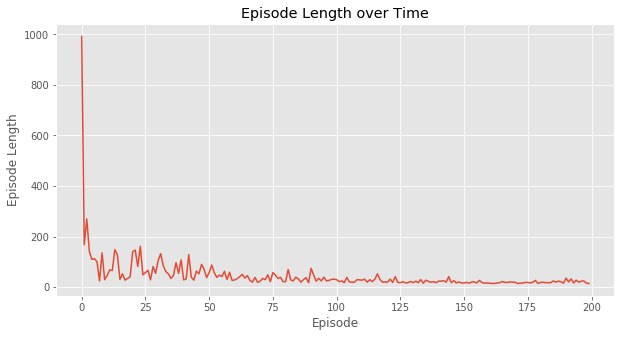

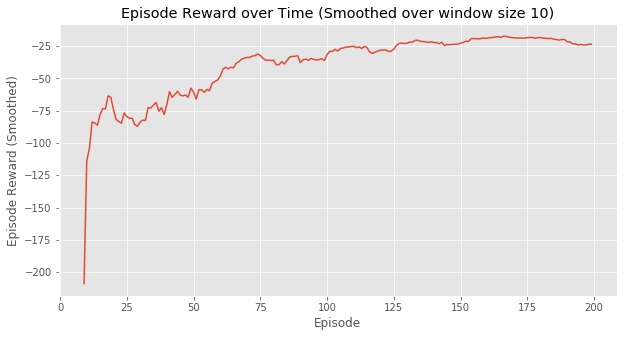

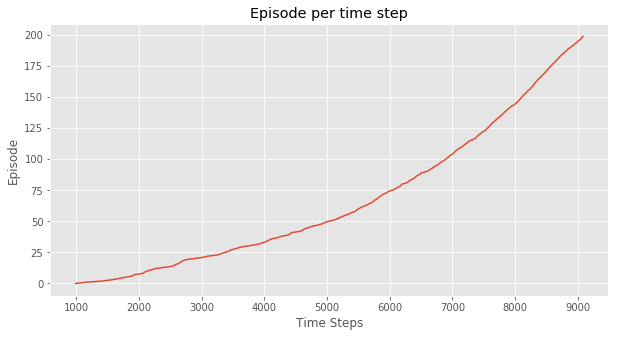

(<matplotlib.figure.Figure at 0x2b019f6dda0>,
 <matplotlib.figure.Figure at 0x2b019f3ab00>)

In [13]:
plotting.plot_episode_stats(stats)

In [14]:
from envs.cliff_walking import CliffWalkingEnv

In [15]:
env = CliffWalkingEnv()

print(env.reset())
env.render()

print(env.step(0))
env.render()

print(env.step(1))
env.render()

print(env.step(1))
env.render()

print(env.step(2))
env.render()

36
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

(24, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

(25, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

(26, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

(38, -100.0, True, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  x  C  C  C  C  C  C  C  C  T



In [17]:
def q_learning(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    """
    Q-Learning algorithm: Off-policy TD control. Finds the optimal greedy policy
    while following an epsilon-greedy policy
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Lambda time discount factor.
        alpha: TD learning rate.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, episode_lengths).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))    
    
    # The BEHAVIOR policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(num_episodes):
        # Print out which episode we're on, useful for debugging.
        if (i_episode + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            sys.stdout.flush()
        
        observation = env.reset()
        
        done = False
        
        action = np.random.choice(env.action_space.n, p = policy(observation))
        
        # length of rewards = episode_length
        rewards = []
        
        while not done:
            next_observation, reward, done, _ = env.step(action)
            
            greedy_action = np.argmax(policy(next_observation))
            
            # update Q here
            Q[observation][action] += alpha * ( reward + discount_factor * Q[next_observation][greedy_action] - Q[observation][action])
            
            observation = next_observation
            action = np.random.choice(env.action_space.n, p = policy(observation))
            
            rewards.append(reward)
        
        episode_reward = 0
        for reward in rewards[::-1]:
            episode_reward = episode_reward * discount_factor + reward
        
        # Update episode length
        stats.episode_lengths[i_episode] = len(rewards)
        
        # Update episode reward
        stats.episode_rewards[i_episode] = episode_reward
    
    return Q, stats

In [18]:
Q, stats = q_learning(env, 500)

Episode 500/500.

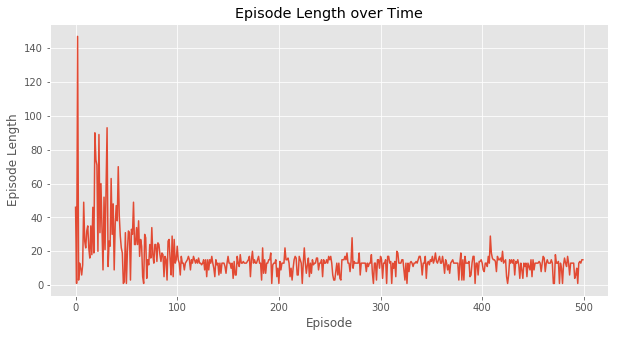

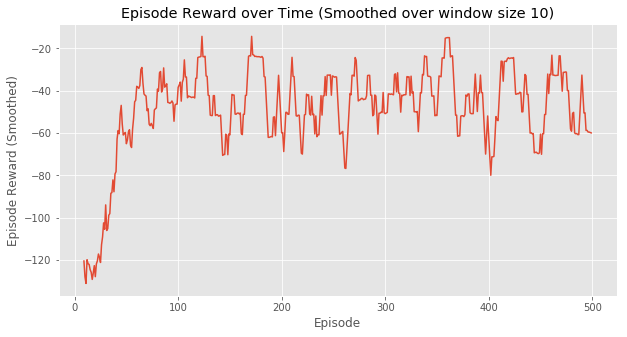

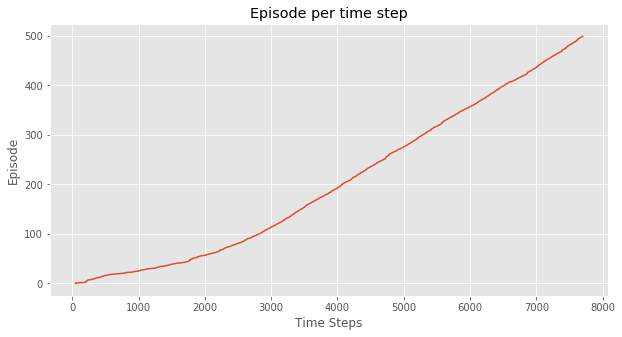

(<matplotlib.figure.Figure at 0x2b01a174208>,
 <matplotlib.figure.Figure at 0x2b01b1cc358>)

In [19]:
plotting.plot_episode_stats(stats)